For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.


Has the network latency gone up since we switched internet service providers?
- H0 - Network latency is NOT affected by switching service providers (status quo)
- H1 - Network latency is affected by switching service providers
- True Postive - latency is affected, and you recognize that correctly
- True Negative - latency is unaffected, and you recognize that correctly
- Type I error - latency is unaffected, but you interpret it as being affected
- Type II error - latency is affected, but you interpret it as not being affected


Is the website redesign any good?
- H0 - website engagement has remained the same after redesign (status quo)
- H1 - website engagement has changed after redesign
- True Postive - website engagement changed
- True Negative - website engagement remained the same
- Type I error - website engagement remained the same, but you interpret a difference
- Type II error - website engagement changed, but you do not validate that change

Is our television ad driving more sales?
- H0 - Television ad has no effect on sales (status quo)
- H1 - Television ad has had an effect on sales
- True Postive - TV ad had an effect on sales
- True Negative - TV ad had no effect on sales
- Type I error - TV ad had no effect on sales, but you show that it did
- Type II error - TV ad had an effect on sales, but you don't support that

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib as plt
import seaborn as sns
from pydataset import data

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [43]:
office1_sample = 40
office1_mean = 90
office1_std = 15

office2_sample = 50
office2_mean = 100
office2_std = 20

alpha = .05

H0 = "office1 avg time == office2 avg time"
H1 = "office1 avg time != office2 avg time"


t,p = stats.ttest_ind_from_stats(mean1=office1_mean, std1=office1_std, nobs1=office1_sample,
                    mean2=office2_mean, std2=office2_std, nobs2=office2_sample)
print('t=%.5f, p=%.5f' % (t,p))
if p > alpha: #no directionality, use the full p
    print("We fail to reject the null hypothesis (", H0,")")
## no t test since directionality doesn't really play into this question
else:
     print(f"We reject the null Hypothesis and accept the alternative ({H1})")

t=-2.62523, p=0.01021
We reject the null Hypothesis and accept the alternative (office1 avg time != office2 avg time)


Load the mpg dataset and use it to answer the following questions:

In [3]:
mpg_df = data("mpg")
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


use equal_var = False stat=0.03107, p=0.86023
1999 mean mpg=19.68, 2008 mean mpg=19.49
t=0.30120, p=0.76354
We fail to reject the null hypothesis ( 1999 mpg == 2008 mpg )


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


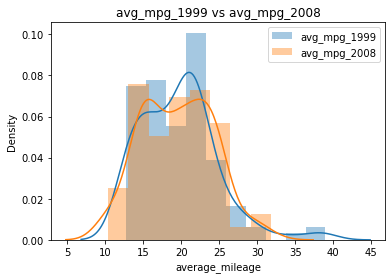

In [24]:
#Load the mpg dataset and use it to answer the following questions:

#Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
H0 = "1999 mpg == 2008 mpg"
H1 = "1999 mpg != 2008 mpg"
mpg_df = data("mpg")
mpg_df["average_mileage"] = (2/((1/mpg_df.hwy) + (1/mpg_df.cty)))

avg_mpg_1999_series = (mpg_df[mpg_df["year"] == 1999]["average_mileage"])
avg_mpg_2008_series = (mpg_df[mpg_df["year"] == 2008]["average_mileage"])

alpha = .05

#compare variances to know how to run the test
stat,pval = stats.levene(avg_mpg_1999_series,avg_mpg_2008_series)
stat,pval
if pval > 0.05:
    equal_var_flag = True
    print("we can reject that there are equal variance in these two groups",'stat=%.5f, p=%.5f' % (stat,pval))
else:
    equal_var_flag = False
    print("use equal_var = False",'stat=%.5f, p=%.5f' % (stat,pval))

#graph it out
ax = sns.distplot(avg_mpg_1999_series,label="avg_mpg_1999")
ax = sns.distplot(avg_mpg_2008_series,label="avg_mpg_2008")
ax.legend()
ax.set_title("avg_mpg_1999 vs avg_mpg_2008")

print('1999 mean mpg=%.2f, 2008 mean mpg=%.2f' % (avg_mpg_1999_series.mean(),avg_mpg_2008_series.mean()))
t, p = stats.ttest_ind( avg_mpg_1999_series , avg_mpg_2008_series , equal_var = equal_var_flag )
print('t=%.5f, p=%.5f' % (t,p))
if p > alpha: #no directionality, use the full p
    print("We fail to reject the null hypothesis (", H0,")")
#elif t < 0: # would pass if alternative mean was less than the null mean ##i don't think directionality really matters
    #print("We fail to reject the null hypothesis (", H0,")")
else:
     print("We reject the null Hypothesis and accept the alternative (", H1,")")


we can reject that there are equal variance in these two groups stat=0.43548, p=0.50997
1999 mean mpg=23.55, 2008 mean mpg=17.45
t=11.24643, p=0.00000
We reject the null Hypothesis and accept the alternative ( compact mpg > standard mpg )


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


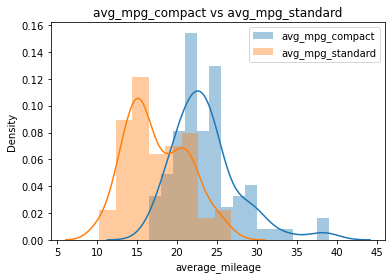

In [20]:
#Are compact cars more fuel-efficient than the average car?
H0 = "compact mpg <= standard mpg"
H1 = "compact mpg > standard mpg"
mpg_df = data("mpg")
mpg_df["average_mileage"] = (2/((1/mpg_df.hwy) + (1/mpg_df.cty)))

avg_mpg_compact_series = (mpg_df[mpg_df["class"].isin(["compact","subcompact"])]["average_mileage"])
avg_mpg_standard_series = (mpg_df[~mpg_df["class"].isin(["compact","subcompact"])]["average_mileage"])

alpha = .05

#compare variances to know how to run the test
stat,pval = stats.levene(avg_mpg_compact_series,avg_mpg_standard_series)
stat,pval
if pval > .05:
    equal_var_flag = True
    print("look like there are equal variance in these two groups",'stat=%.5f, p=%.5f' % (stat,pval))
else:
    equal_var_flag = False
    print("use equal_var = False",'stat=%.5f, p=%.5f' % (stat,pval))

#graph it out
ax = sns.distplot(avg_mpg_compact_series,label="avg_mpg_compact")
ax = sns.distplot(avg_mpg_standard_series,label="avg_mpg_standard")
ax.legend()
ax.set_title("avg_mpg_compact vs avg_mpg_standard")

print('1999 mean mpg=%.2f, 2008 mean mpg=%.2f' % (avg_mpg_compact_series.mean(),avg_mpg_standard_series.mean()))

t, p = stats.ttest_ind( avg_mpg_compact_series , avg_mpg_standard_series , equal_var = equal_var_flag )
print('t=%.5f, p=%.5f' % (t,p))

if p/2 > alpha: #no directionality, use the full p
    print("We fail to reject the null hypothesis (", H0,")")
elif t < 0: # would pass if alternative mean was less than the null mean
    print("We fail to reject the null hypothesis (", H0,")")
else:
     print("We reject the null Hypothesis and accept the alternative (", H1,")")

we can reject that there are equal variance in these two groups stat=0.01390, p=0.90625
manual mean mpg=21.63, automatic mean mpg=18.58
t=4.65258, p=0.00001
We reject the null Hypothesis and accept the alternative ( manual mpg > automatic mpg )


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


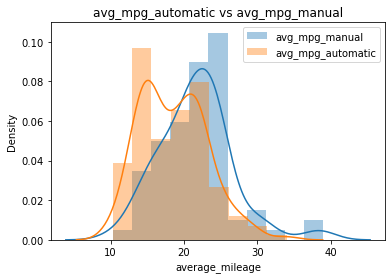

In [25]:
#Do manual cars get better gas mileage than automatic cars?
H0 = "manual mpg <= automatic mpg"
H1 = "manual mpg > automatic mpg"
mpg_df = data("mpg")
mpg_df["average_mileage"] = (2/((1/mpg_df.hwy) + (1/mpg_df.cty)))

avg_mpg_manual_series = (mpg_df[mpg_df["trans"].isin(["manual(m5)", "manual(m6)"])]["average_mileage"])
avg_mpg_automatic_series = (mpg_df[~mpg_df["trans"].isin(["manual(m5)", "manual(m6)"])]["average_mileage"])

alpha = .05

#compare variances to know how to run the test
stat,pval = stats.levene(avg_mpg_manual_series,avg_mpg_automatic_series)
stat,pval
if pval > .05:
    equal_var_flag = True
    print("we can reject that there are equal variance in these two groups",'stat=%.5f, p=%.5f' % (stat,pval))
else:
    equal_var_flag = False
    print("use equal_var = False",'stat=%.5f, p=%.5f' % (stat,pval))

#graph it out
ax = sns.distplot(avg_mpg_manual_series,label="avg_mpg_manual")
ax = sns.distplot(avg_mpg_automatic_series,label="avg_mpg_automatic")
ax.legend()
ax.set_title("avg_mpg_automatic vs avg_mpg_manual")

print('manual mean mpg=%.2f, automatic mean mpg=%.2f' % (avg_mpg_manual_series.mean(), avg_mpg_automatic_series.mean()))

t, p = stats.ttest_ind( avg_mpg_manual_series , avg_mpg_automatic_series , equal_var = equal_var_flag )
print('t=%.5f, p=%.5f' % (t,p))

if p/2 > alpha: #no directionality, use the full p
    print("We fail to reject the null hypothesis (", H0,")")
elif t < 0: # would pass if alternative mean was less than the null mean
    print("We fail to reject the null hypothesis (", H0,")")
else:
     print("We reject the null Hypothesis and accept the alternative (", H1,")")